# Classification of the Iris Dataset


## Importing the Analysis and Visualization Libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the CSV File

In [43]:
iris = pd.read_csv('../Iris/iris-species/Iris.csv')

## Looking at the head of the dataset

In [44]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Visualization of the columns in the datasets

In [45]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Let's drop the ID row, which is useless and does not help us in any analysis or visualization. 

In [46]:
iris.drop('Id',axis=1,inplace=True)

## Exploratory Data Analysis

Text(0.5,1,'Sepal Length vs Width')

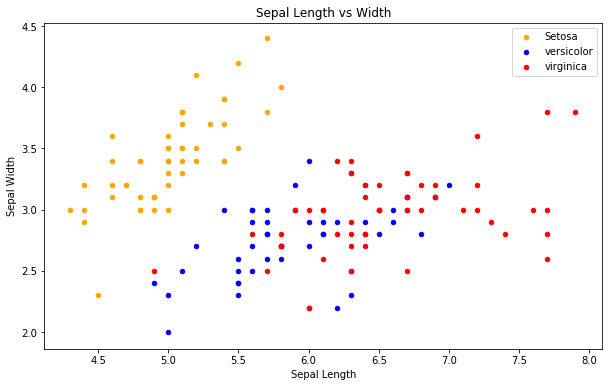

In [47]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label='Setosa',figsize=(10,6))
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label='virginica',ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Width')

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

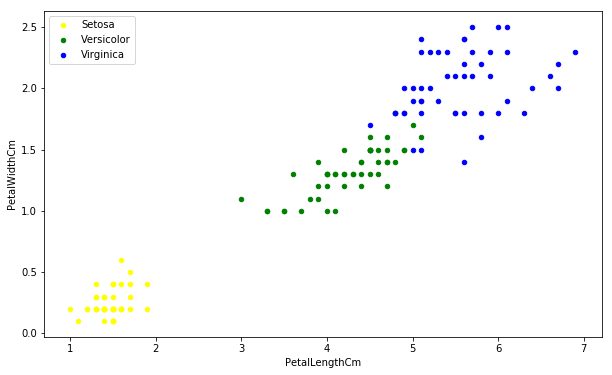

In [48]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='yellow',label='Setosa',figsize=(10,6))
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',label='Versicolor',color='Green',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',label='Virginica',color='blue',ax=fig)

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

## Distribution of Length and Widths

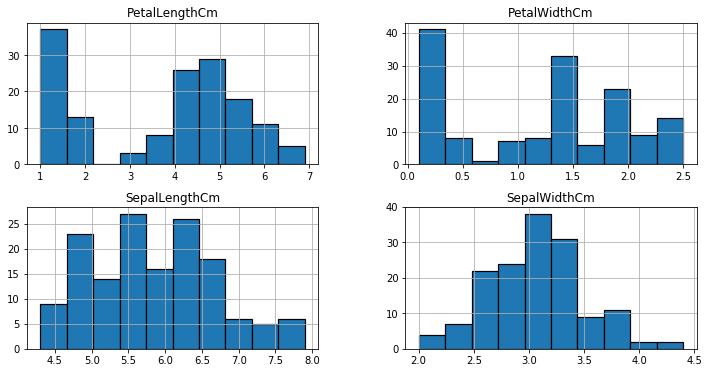

In [49]:
iris.hist(edgecolor='black',linewidth=1.2,figsize=(12,6))
fig=plt.gcf()

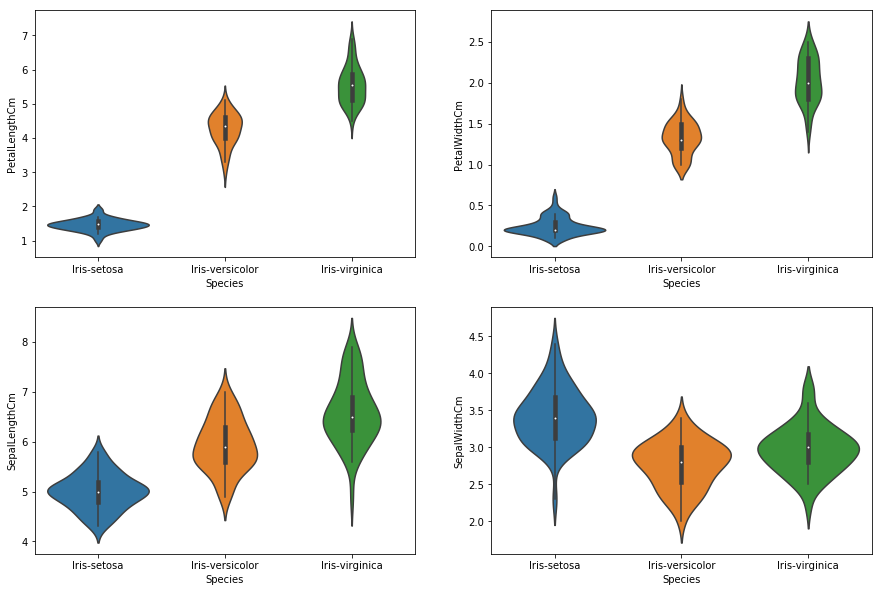

In [50]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density.

## Classification using Machine Learning

Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

Regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.

attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

## Importing the Machine Learning Libraries

In [122]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm

In [123]:
iris.shape

(150, 5)

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

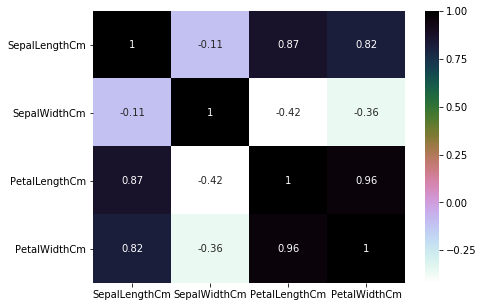

In [124]:
plt.figure(figsize=(7,5))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

## Steps in using a Machine Learning Algorithm:

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good.

Then pass the training dataset to the algorithm to train it. We use the .fit() method.

Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.

We then check the accuracy by passing the predicted outcome and the actual output to the model.

## Splitting The Data into Training And Testing Dataset

In [125]:
train, test = train_test_split(iris, test_size=0.3, random_state=101)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [128]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train[['Species']]
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test[['Species']]

In [129]:
train_X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
13,4.3,3.0,1.1,0.1
102,7.1,3.0,5.9,2.1
67,5.8,2.7,4.1,1.0
34,4.9,3.1,1.5,0.1
98,5.1,2.5,3.0,1.1


In [130]:
test_X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
50,7.0,3.2,4.7,1.4


In [131]:
print(train_X.shape)
print(train_y.shape)

(105, 4)
(105, 1)


## Support Vector Machine (SVM)

In [132]:
model = svm.SVC()
model.fit(train_X,train_y.values.ravel())
prediction=model.predict(test_X)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))
print(classification_report(prediction,test_y))

The accuracy of the SVM is: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

    avg / total       1.00      1.00      1.00        45



## Logistic Regression

In [133]:
model = LogisticRegression()
model.fit(train_X,train_y.values.ravel())
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))
print(classification_report(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.90      1.00      0.95        18
 Iris-virginica       1.00      0.86      0.92        14

    avg / total       0.96      0.96      0.96        45



## Decision Tree Classifier

In [134]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y.values.ravel())
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))
print(classification_report(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

    avg / total       0.96      0.96      0.96        45



## K-Neighbors Classifier

In [135]:
model=KNeighborsClassifier(n_neighbors=7) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y.values.ravel())
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))
print(classification_report(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.92      0.96        13

    avg / total       0.98      0.98      0.98        45



## Writing a function to find the best value for number of neighbors

([<matplotlib.axis.XTick at 0x1a18add4e0>,
 <a list of 10 Text xticklabel objects>)

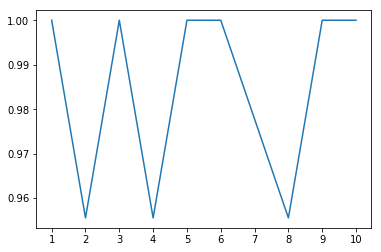

In [138]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y.values.ravel())
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y.values.ravel())))
plt.plot(a_index, a)
plt.xticks(x)

We used all the features of iris in above models. Now we will use Petals and Sepals Separately.

## Creating Petals And Sepals Training Data

In [142]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [143]:
train_p , test_p = train_test_split(petal,test_size=0.3,random_state=101)
train_X_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p[['Species']]
test_X_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p[['Species']]

In [146]:
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_X_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_X_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

## SVM

In [152]:
model=svm.SVC()
model.fit(train_X_p,train_y_p.values.ravel()) 
prediction=model.predict(test_X_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_X_s,train_y_s) 
prediction=model.predict(test_X_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


## Logistic Regression

In [153]:
model = LogisticRegression()
model.fit(train_X_p,train_y_p.values.ravel()) 
prediction=model.predict(test_X_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_X_s,train_y_s) 
prediction=model.predict(test_X_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.6444444444444445
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


## Decision Tree Classifier

In [154]:
model=DecisionTreeClassifier()
model.fit(train_X_p,train_y_p.values.ravel()) 
prediction=model.predict(test_X_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_X_s,train_y_s) 
prediction=model.predict(test_X_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


## K-Neighbors Classifier

In [155]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_X_p,train_y_p.values.ravel()) 
prediction=model.predict(test_X_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_X_s,train_y_s) 
prediction=model.predict(test_X_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


## Observations:

Using Petals over Sepal for training the data gives a much better accuracy.

This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.